# Reconstructions with Simulated Data

Using the reconstruction class, but with ground truth from a strobed example

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities import io


In [2]:
# Define user for path setting
user = 'sarah'

if user == 'sarah':
    dataset_path_stem = '/home/sarah/Dropbox/deblurring/motiondeblur_datasets/'
else:
    dataset_path_stem = '/Users/zfphil/Dropbox/Berkeley/Datasets/motiondeblur_datasets/'

# Process dataset path
dataset_path = 'res_target_color_coded_raster_motiondeblur_2018_05_22_19_17_45'
filename = dataset_path_stem + dataset_path

# Object true dataset for simulation
simulate_file = '/home/sarah/Dropbox/deblurring/res_target_color_strobe_raster_motiondeblur_2018_05_22_19_17_18_recovered_[19, 20, 21, 22, 23].npz'

# Define regularization
reg_types = {} # {'l2': 1e-3, 'wavelet': 2e-4} # l2, l1, wavelet

# Define iteration count to sweep
n_iters = 10

frame_idx = [20,21,22]

In [3]:
# Load dataset
dataset = io.Dataset(filename, frame_subset=frame_idx)

# Perform motion-deblur related preprocessing
md.preprocess(dataset)

Metadata indicates background has already been subtracted.


<IPython.core.display.Javascript object>


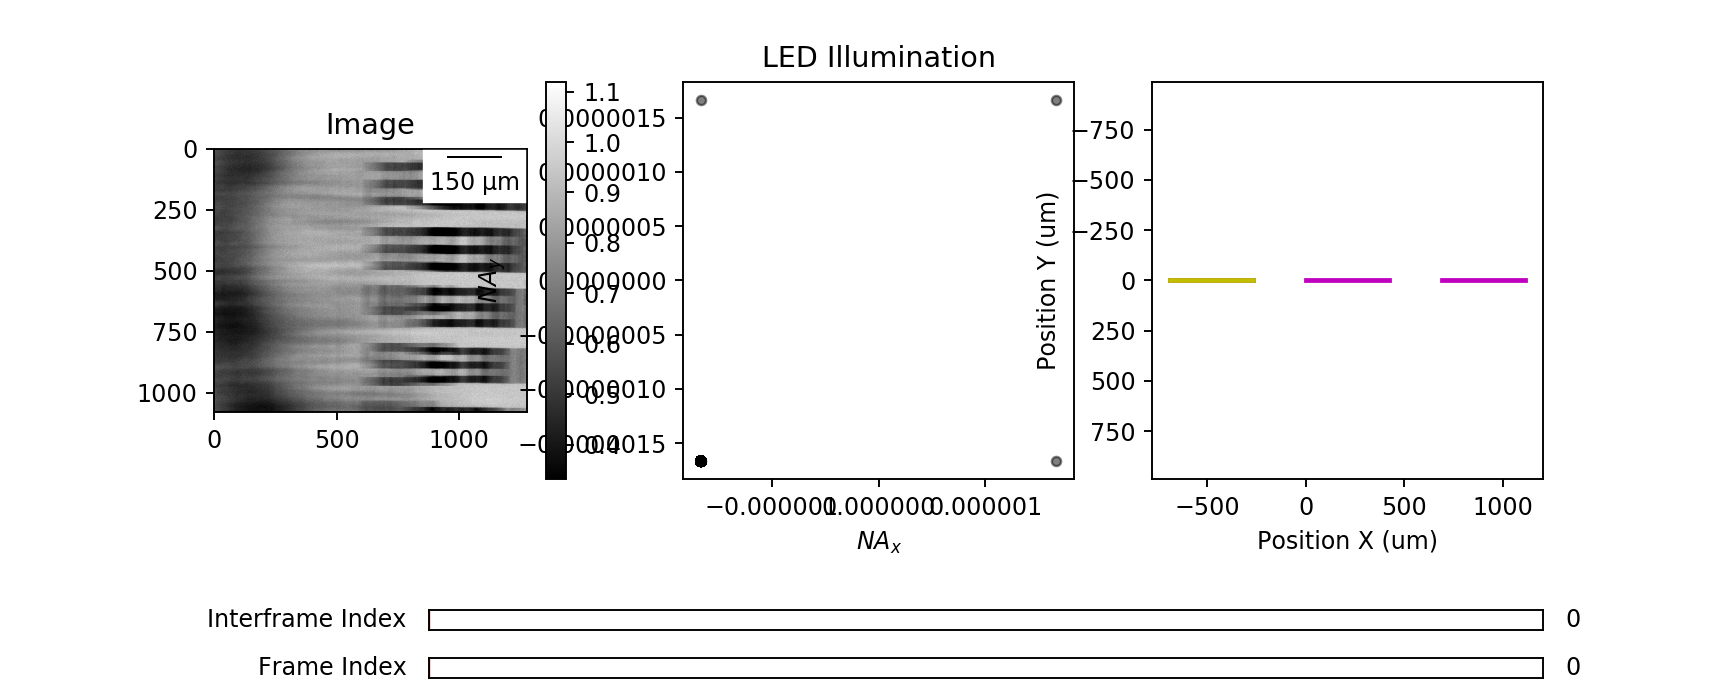

(<matplotlib.figure.Figure at 0x7f7aec594f60>,
 <function libwallerlab.utilities.io.Dataset.show.<locals>.frame_update_function_handle(frame_index)>,
 <function libwallerlab.utilities.io.Dataset.show.<locals>.interframe_update_function_handle(interframe_index)>)

In [4]:
dataset.show()


## Simulation Recovery

This is a sanity check that should work nearly perfectly

Image size is 1080 x 1280, Object size is 1080 x 3639, Blur kernel size is 1080 x 1591
Processed kernel 1 of 3
Processed kernel 2 of 3
Processed kernel 3 of 3


<IPython.core.display.Javascript object>


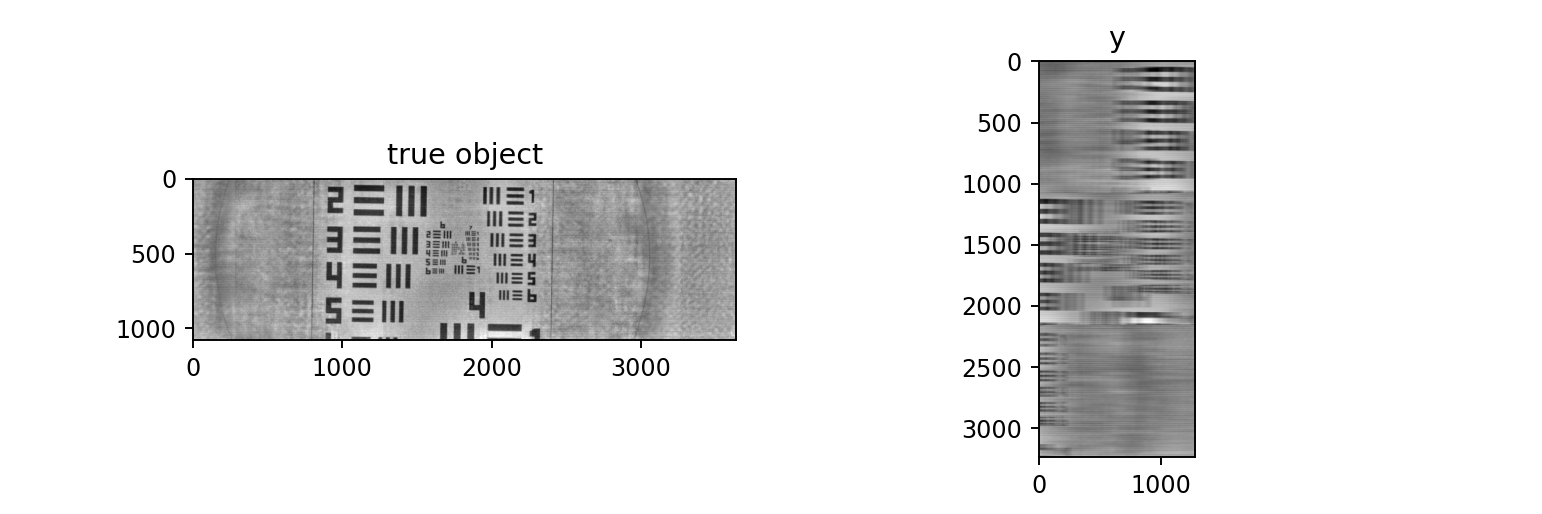

In [7]:
recon = md.Reconstruct(dataset)
recon.gen_forward_model() #flip_crop_start=True)
recon.simulate_measurements(simulate_file, crop_offset=(0,1000), show=True)

In [15]:
recon.reconstruct(-1, frame_number=1, reg_types=reg_types)

<IPython.core.display.Javascript object>


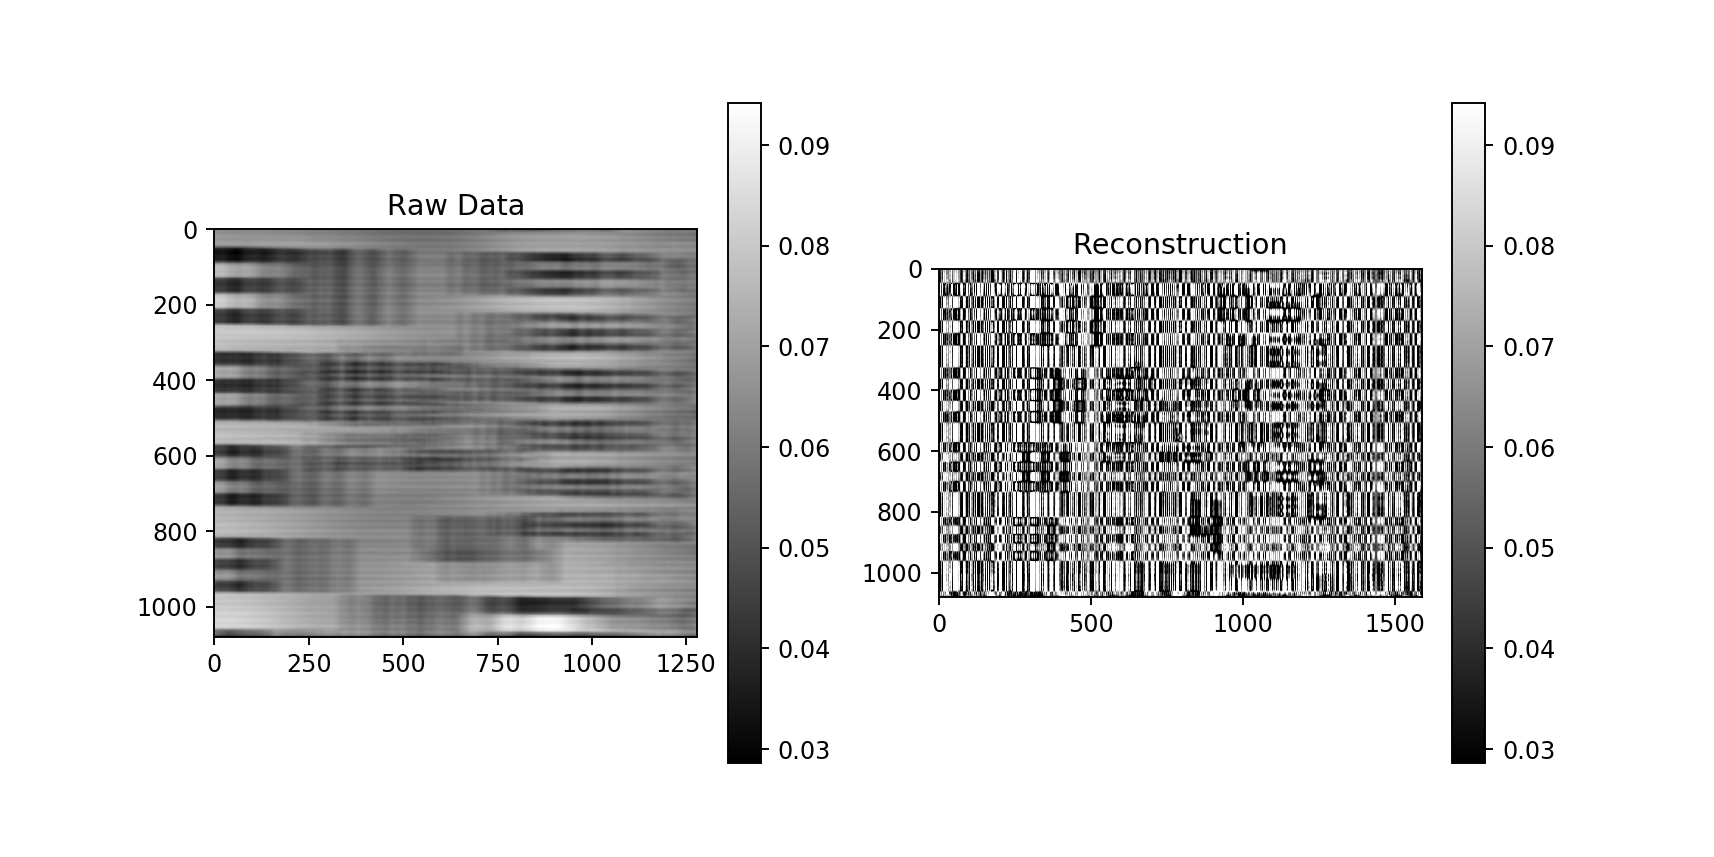

In [17]:
recon.show()

It is weird that there are still some reconstruction errors above. Are they due to the optimization method? Or perhaps because the windowing functions do have a nullspace.

## Simulated Recover with Model Mismatch

Now, we foce a model mismatch. The recovery has familiar artifacts. Interestingly, I did not see the diverging behavior of the optimization.

Image size is 1080 x 1280, Object size is 1080 x 3639, Blur kernel size is 1080 x 1591
Processed kernel 1 of 3
Processed kernel 2 of 3
Processed kernel 3 of 3
crop starting locations: (0, 0), (0, 1024) (0, 2048)
crop starting locations: (0, 0), (0, 994) (0, 1988)


<IPython.core.display.Javascript object>


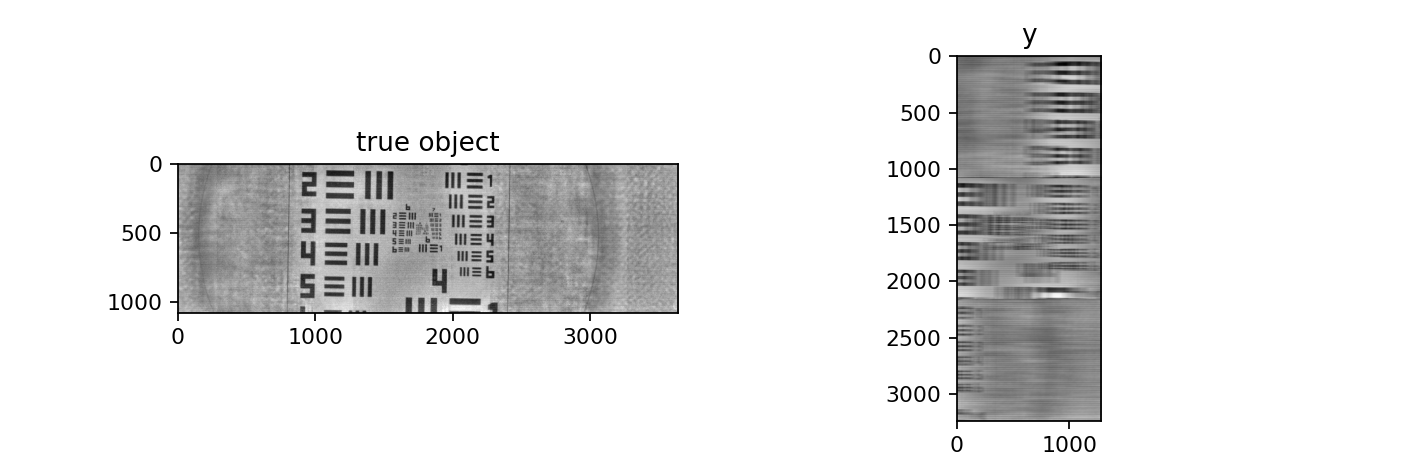

In [28]:
recon = md.Reconstruct(dataset, frame_indicies_to_process=frame_idx)
recon.gen_forward_model()
recon.simulate_measurements(simulate_file, crop_offset=(0,1000), show=True, adjust_by=[0,-30])

In [15]:
recon.reconstruct(100, reg_types=reg_types)

|   10   |    1.06e+01    |       27.04        |
|   20   |    3.96e+00    |       50.33        |
|   30   |    2.58e+00    |       73.61        |
|   40   |    1.97e+00    |       96.85        |
|   50   |    1.60e+00    |      120.70        |
|   60   |    1.41e+00    |      144.72        |
|   70   |    1.29e+00    |      168.04        |
|   80   |    1.24e+00    |      192.35        |
|   90   |    1.21e+00    |      215.79        |
|  100   |    1.17e+00    |      238.98        |


<IPython.core.display.Javascript object>


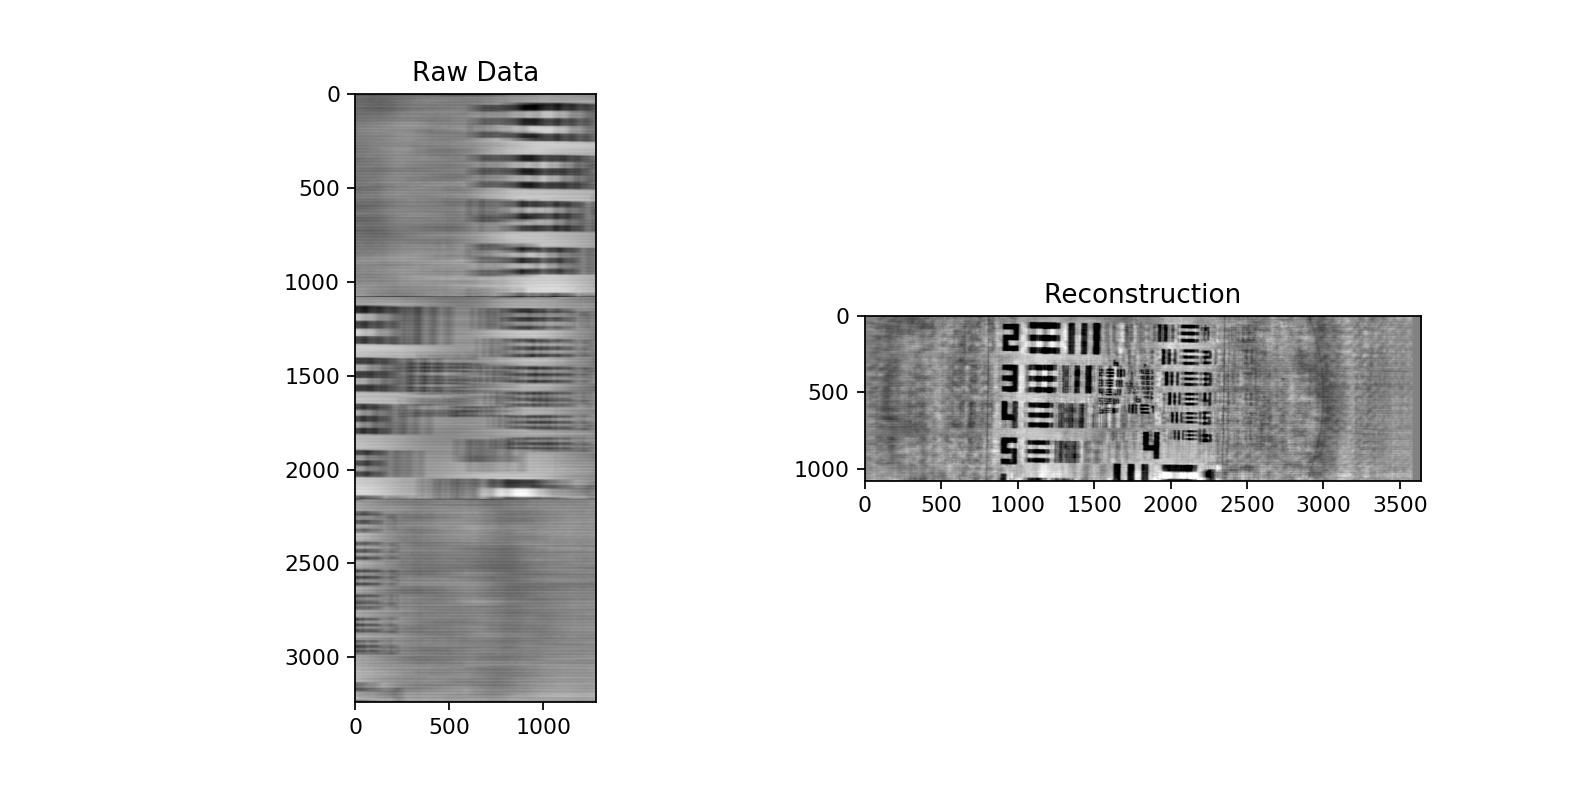

(0.023936057, 0.094556384)


<IPython.core.display.Javascript object>


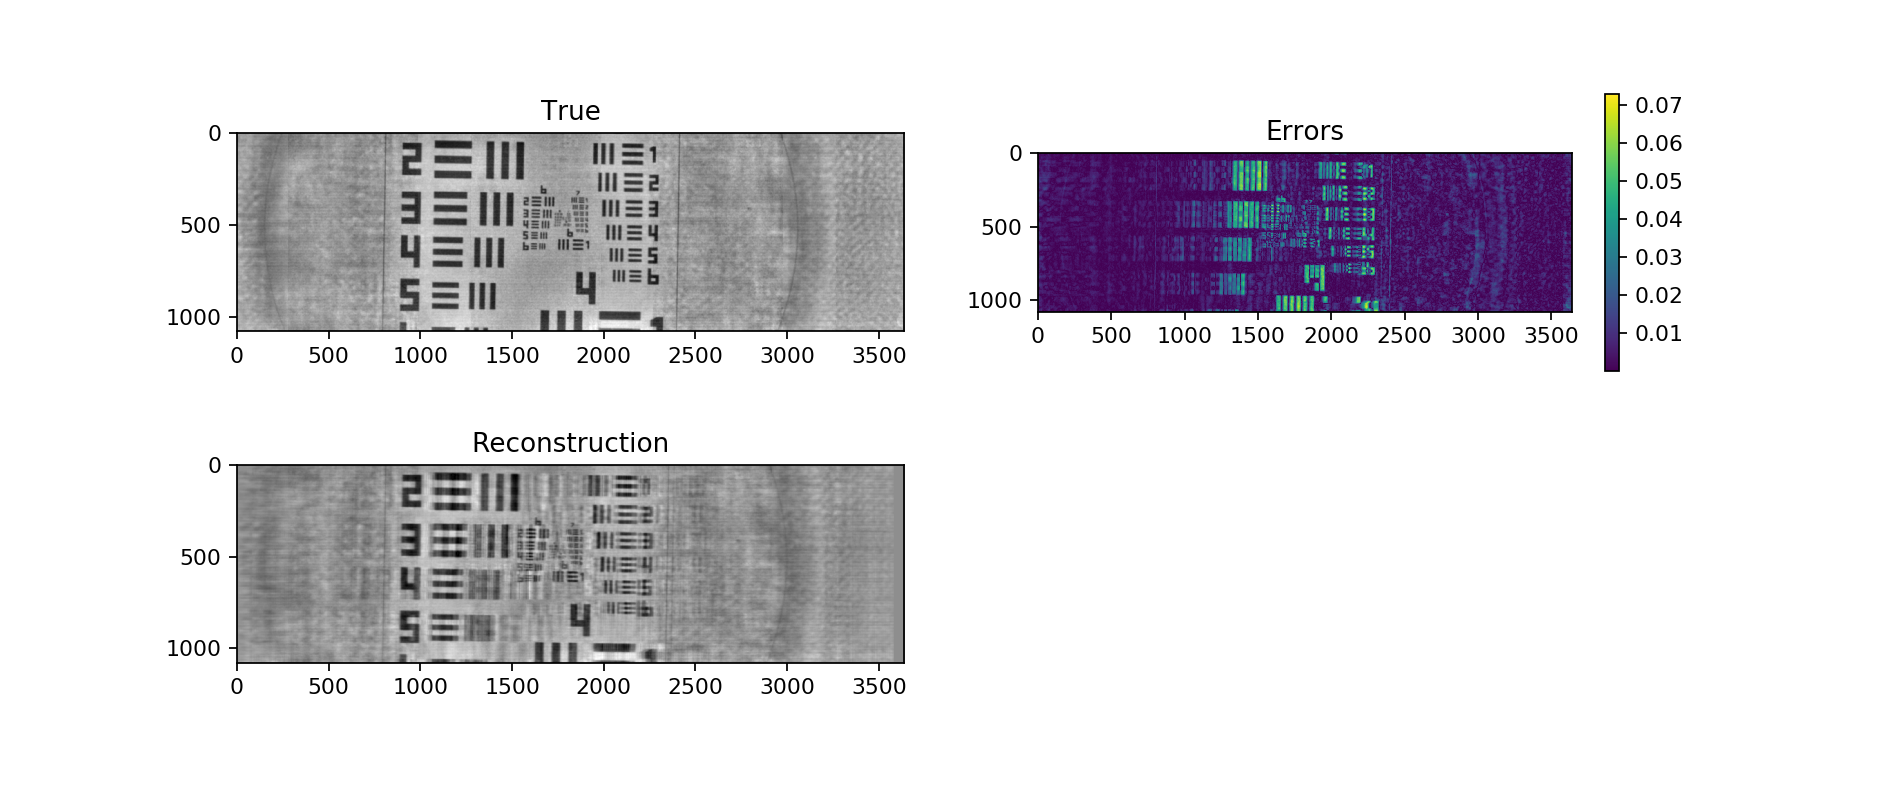

In [16]:
recon.show()

# Autocalibration 
Next, we use this simulation testbed to see how autocalibration methods work

## Registration-based Method
First, we implement the registration based method where frames are deblurred individually and registered to find the positions.

Image size is 1080 x 1280, Object size is 1080 x 3639, Blur kernel size is 1080 x 1591
Processed kernel 1 of 3
Processed kernel 2 of 3
Processed kernel 3 of 3
crop starting locations: (0, 0), (0, 1024) (0, 2048)
crop starting locations: (0, 0), (0, 994) (0, 1988)


<IPython.core.display.Javascript object>


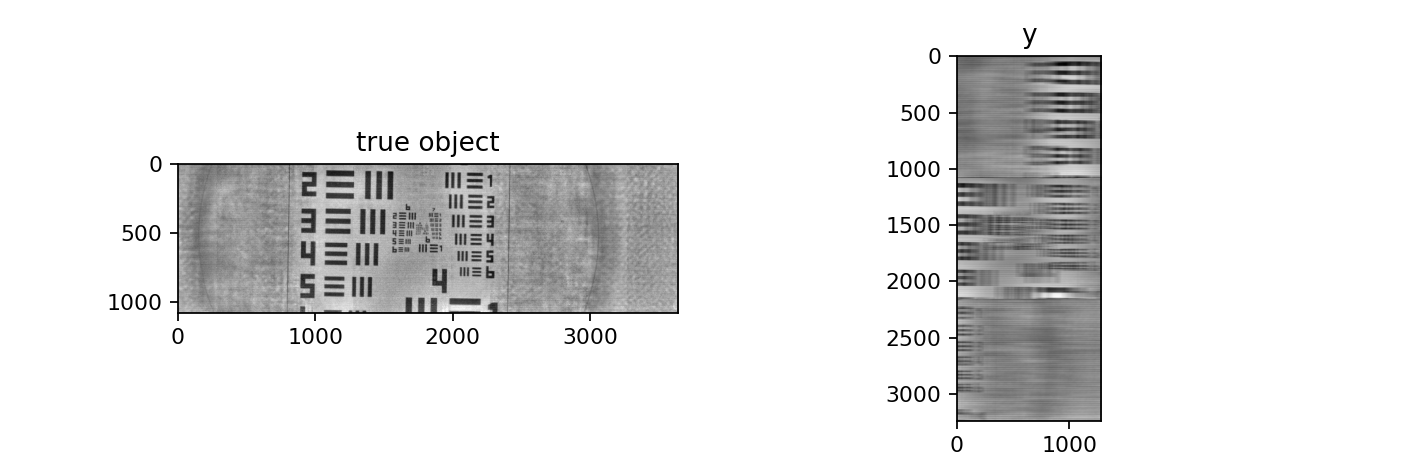

In [29]:
recon = md.Reconstruct(dataset, frame_indicies_to_process=frame_idx)
recon.gen_forward_model()
recon.simulate_measurements(simulate_file, crop_offset=(0,1000), show=True, adjust_by=[0,-30])

In [30]:
recon.gen_singleframe_forward_models()
# recon.objects_recovered_singleframe = recon.y_list
recon.reconstruct_singeframe(70) 
# recon.show_singleframe()

Minimizing funtion:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (sec) |
+ ------ + -------------- + ------------------ +
|    0   |    4.05e+04    |        0.00        |
|    7   |    6.58e+03    |        4.63        |
|   14   |    1.51e+03    |        9.49        |
|   21   |    9.78e+02    |       14.24        |
|   28   |    6.72e+02    |       19.21        |
|   35   |    4.93e+02    |       23.85        |
|   42   |    3.56e+02    |       28.48        |
|   49   |    2.62e+02    |       33.32        |
|   56   |    2.11e+02    |       38.41        |
|   63   |    1.81e+02    |       43.19        |
|   70   |    1.59e+02    |       47.99        |
Minimizing funtion:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (sec) |
+ ------ + -------------- + ------------------ +
|    0   |    3.66e+04    |        0.00        |
|    7   |    6.52e+03    |        4.50        |
|   14   |    1.68e+03    |        9.52        |
|   21   |    9.93e+02    |       14.27        |
|   28   |    7.51e+02    |       19.33        |
|   35   |    5.71e+02    |       24.11        |
|   42   |    4.41e+02    |       28.95        |
|   49   |    3.46e+02    |       33.89        |
|   56   |    2.79e+02    |       38.47        |
|   63   |    2.28e+02    |       43.16        |
|   70   |    1.94e+02    |       47.70        |
Minimizing funtion:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (sec) |
+ ------ + -------------- + ------------------ +
|    0   |    1.73e+04    |        0.00        |
|    7   |    4.70e+03    |        4.36        |
|   14   |    7.91e+02    |        8.94        |
|   21   |    5.10e+02    |       13.48        |
|   28   |    3.39e+02    |       18.02        |
|   35   |    2.74e+02    |       22.78        |
|   42   |    2.25e+02    |       27.40        |
|   49   |    1.89e+02    |       31.92        |
|   56   |    1.64e+02    |       36.44        |
|   63   |    1.40e+02    |       40.95        |
|   70   |    1.21e+02    |       45.45        |


[array([   0., -594.]), array([   0., -593.])]
centerpoints [array([ 0.,  0.]), array([   0.,  997.]), array([    0.,  1995.])]


<IPython.core.display.Javascript object>


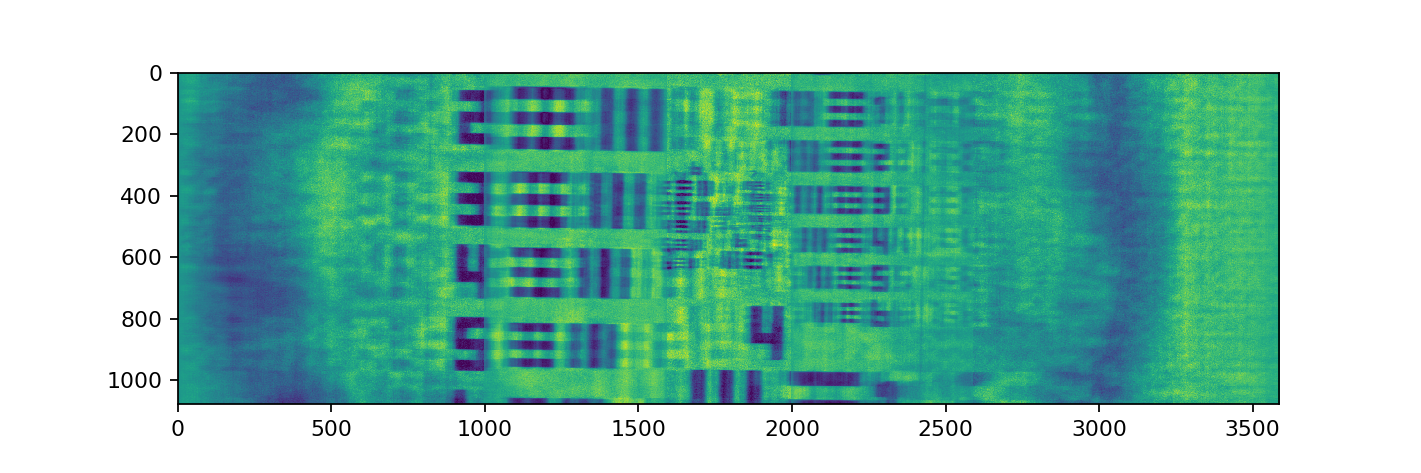

In [31]:
recon.register_singleframe_reconstructions(process=False, sigma=3, debug=False, show_stitched=True)


In [32]:
recon.reconstruct_multiframe_from_singleframe(100, singleframeinit=False)


crop starting locations: [0 0], [  0 997] [   0 1995]
(1080, 3639)
Minimizing funtion:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (sec) |
+ ------ + -------------- + ------------------ +
|    0   |    1.85e+06    |        0.00        |
|   10   |    1.14e+01    |       21.66        |
|   20   |    4.04e+00    |       44.19        |
|   30   |    2.53e+00    |       66.93        |
|   40   |    1.86e+00    |       88.91        |
|   50   |    1.46e+00    |      110.74        |
|   60   |    1.27e+00    |      133.34        |
|   70   |    1.14e+00    |      155.30        |
|   80   |    1.07e+00    |      177.79        |
|   90   |    1.05e+00    |      199.73        |
|  100   |    1.01e+00    |      221.57        |


<IPython.core.display.Javascript object>


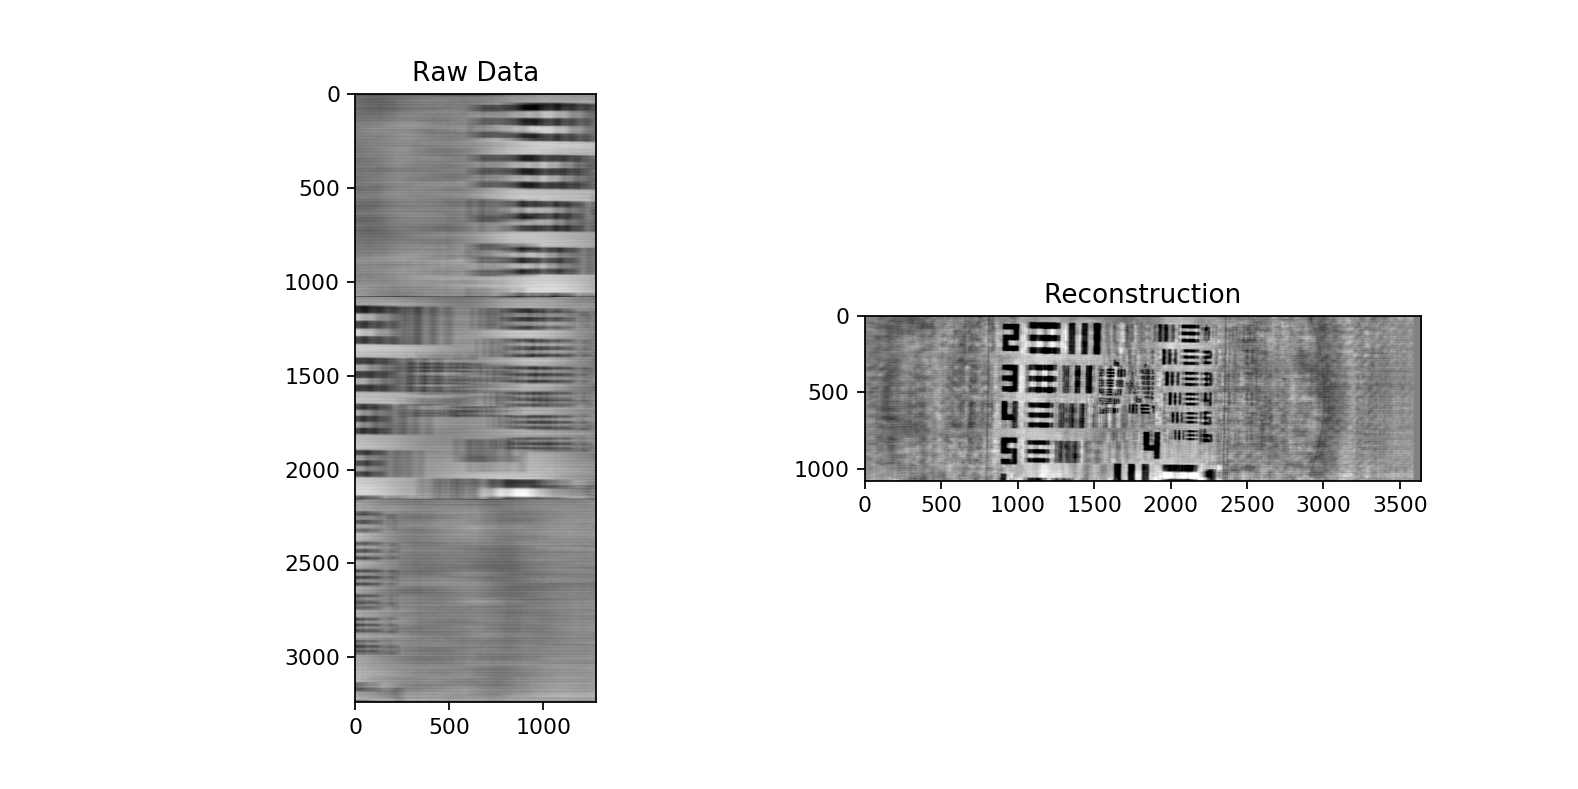

(0.023936057, 0.094556384)


<IPython.core.display.Javascript object>


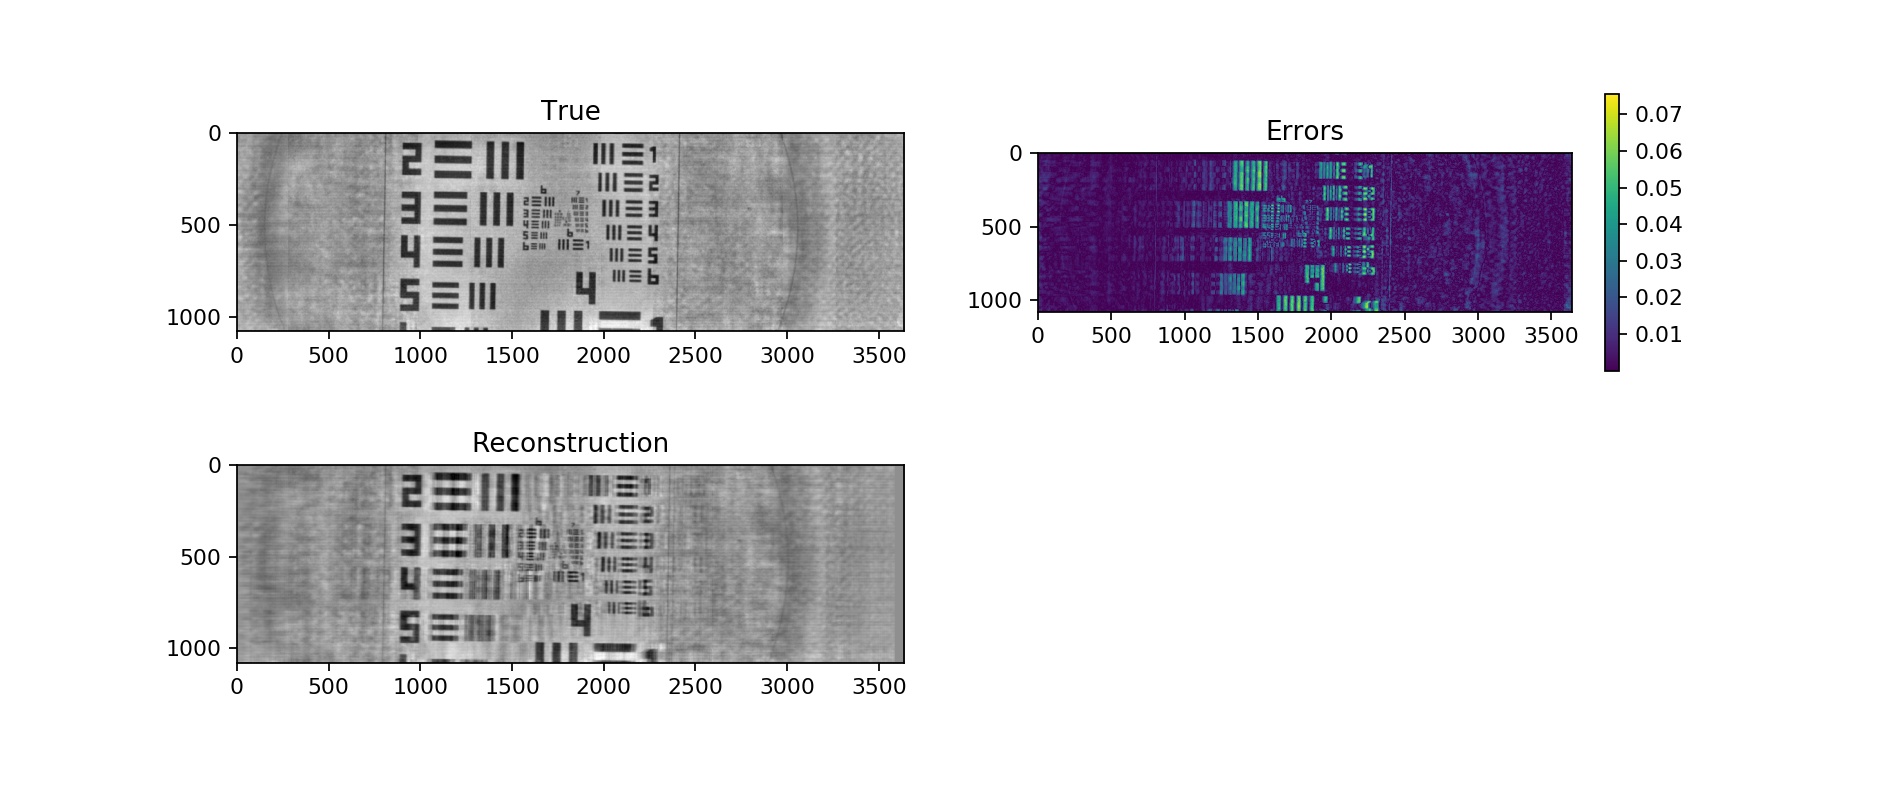

In [33]:
recon.show()

## Alternating Minimization Method